In [1]:
import torchvision.datasets

In [6]:
from torchvision.datasets import CelebA 

In [3]:
import h5py
import zipfile
import imageio
import os

In [ ]:
%%time

# location of the HDF5 package, yours may be under /gan/ not /myo_gan/
hdf5_file = 'celeba_aligned_small.h5py'

# how many of the 202,599 images to extract and package into HDF5
total_images = 2000

with h5py.File(hdf5_file, 'w') as hf:

    count = 0

    with zipfile.ZipFile('celeba/img_align_celeba.zip', 'r') as zf:
      for i in zf.namelist():
        if (i[-4:] == '.jpg'):
          # extract image
          ofile = zf.extract(i)
          img = imageio.imread(ofile)
          os.remove(ofile)

          # add image data to HDF5 file with new name
          hf.create_dataset('img_align_celeba/'+str(count)+'.jpg', data=img, compression="gzip", compression_opts=9)
          
          count = count + 1
          if (count%1000 == 0):
            print("images done .. ", count)
            pass
            
          # stop when total_images reached
          if (count == total_images):
            break
          pass

        pass
      pass

images done ..  1000
images done ..  2000
images done ..  3000
images done ..  4000
images done ..  5000
images done ..  6000
images done ..  7000
images done ..  8000
images done ..  9000
images done ..  10000
images done ..  11000
images done ..  12000
images done ..  13000
images done ..  14000
images done ..  15000
images done ..  16000
images done ..  17000
images done ..  18000
images done ..  19000
images done ..  20000
CPU times: user 3min 23s, sys: 14.6 s, total: 3min 37s
Wall time: 4min 31s


In [11]:
import numpy
import matplotlib.pyplot as plt

In [9]:
with h5py.File('celeba_aligned_small.h5py', 'r') as file_object:
  
  for group in file_object:
    print(group)
    pass

img_align_celeba


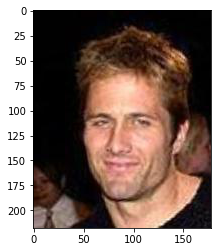

In [16]:
with h5py.File('celeba_aligned_small.h5py', 'r') as file_object:
    dataset = file_object['img_align_celeba']
    image = numpy.array(dataset['3000.jpg'])
    plt.imshow(image, interpolation='none')
    pass

In [13]:
image.shape

(218, 178, 3)